In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths to CSV files by scale
scale_paths = {
    'scale_1': 'power_test_result/scale_1/query_execution_times.csv',
    'scale_1.5': 'power_test_result/scale_1.5/query_execution_times.csv',
    'scale_2': 'power_test_result/scale_2/query_execution_times.csv',
    'scale_3': 'power_test_result/scale_3/query_execution_times.csv'
}

# Groups for categorization
groups = {
    "Reporting": [1,2,6,8,9,11,13,15,16,18,24,26,28,31,32,36,37,40,45,47,49,51,53,55,57,59,60,61,66,71,73,77,79,80,82,83,85,87,89,91,94,96,97,98],
    "Ad-hoc": [10,12,14,17,19,20,21,22,23,44,52,54,56,58,63,67,95],
    "Iterative OLAP": [3,4,5,25,27,29,30,33,34,35,38,39,41,43,46,48,50,64,65,69,72,74,76,78,81,84,86,88,90,93],
    "Data Mining": [7,42,62,68,70,75,92,99]
}
# Colors for each group
colors = {
    "Reporting": 'blue',
    "Ad-hoc": 'green',
    "Iterative OLAP": 'orange',
    "Data Mining": 'red'
}

In [3]:
# Dictionary for storing results
all_data = {}
stats = {
    'Total_Time': {},
    'Longest_Time': {},
    'Smallest_Time': {},
    'Mean_Time': {}
}

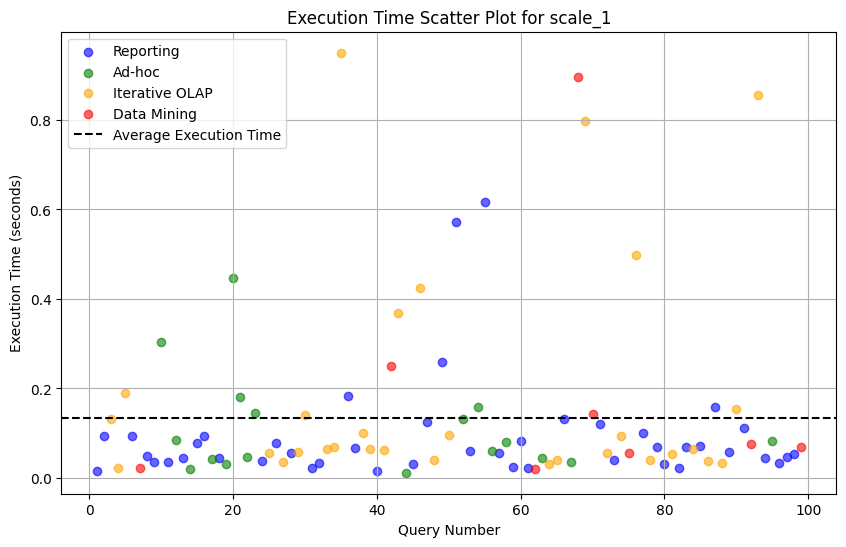

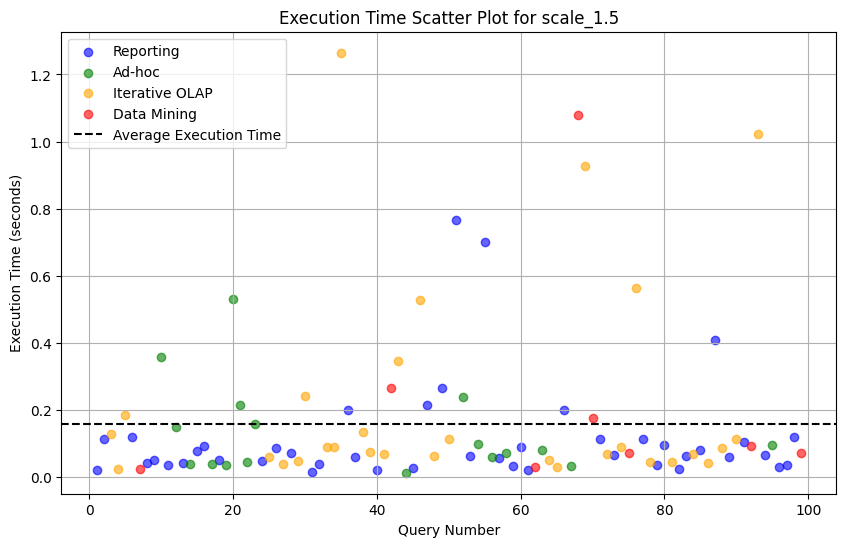

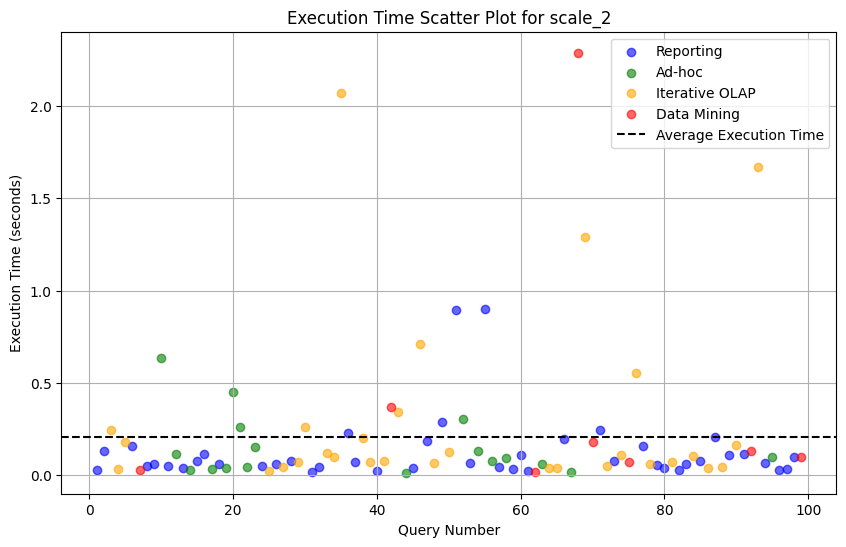

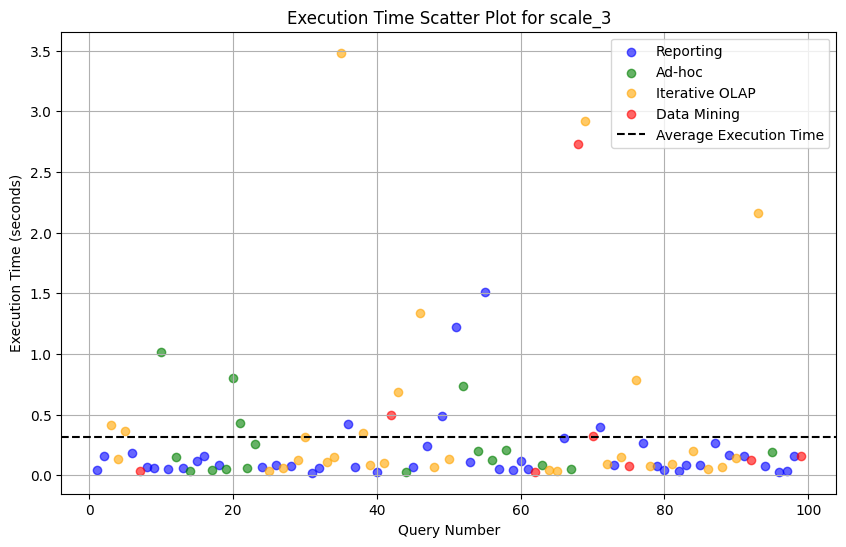

In [4]:
for scale, path in scale_paths.items():
    df = pd.read_csv(path)
    df['Query_Number'] = df['Query'].str.extract(r'query_(\d+)\.sql').astype(int)
    
    stats['Total_Time'][scale] = df['Execution Time'].sum()
    stats['Longest_Time'][scale] = df['Execution Time'].max()
    stats['Smallest_Time'][scale] = df['Execution Time'].min()
    stats['Mean_Time'][scale] = df['Execution Time'].mean()
    
    plt.figure(figsize=(10, 6))
    for group, query_numbers in groups.items():
        group_df = df[df['Query_Number'].isin(query_numbers)]
        plt.scatter(group_df['Query_Number'], group_df['Execution Time'], 
                    color=colors[group], label=group, alpha=0.6)
        all_data[(scale, group)] = {
            'Total_Time': group_df['Execution Time'].sum(),
            'Average_Time': group_df['Execution Time'].mean(),
            'Longest_Time': group_df['Execution Time'].max(),
            'Smallest_Time': group_df['Execution Time'].min()
        }
    
    plt.axhline(y=stats['Mean_Time'][scale], linestyle='--', color = 'black', label=f"Average Execution Time")    
    plt.xlabel("Query Number")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Execution Time Scatter Plot for {scale}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
all_data_df = pd.DataFrame.from_dict(all_data, orient='index')
all_data_df

Total_Time  Average_Time  Longest_Time  \
scale_1   Reporting         4.084463      0.092829      0.616139   
          Ad-hoc            1.908611      0.112271      0.446657   
          Iterative OLAP    5.629724      0.187657      0.950181   
          Data Mining       1.530268      0.191283      0.895084   
scale_1.5 Reporting         5.051903      0.114816      0.766622   
          Ad-hoc            2.263737      0.133161      0.530559   
          Iterative OLAP    6.651265      0.221709      1.264749   
          Data Mining       1.812295      0.226537      1.079801   
scale_2   Reporting         5.529483      0.125670      0.899989   
          Ad-hoc            2.560869      0.150639      0.637374   
          Iterative OLAP    8.979805      0.299327      2.067066   
          Data Mining       3.191690      0.398961      2.287102   
scale_3   Reporting         7.972331      0.181189      1.510140   
          Ad-hoc            4.474283      0.263193      1.016659   
          Iterative OLAP   14.782298      0.492743      3.482638   
          Data Mining       3.981229      0.497654      2.730785   

                          Smallest_Time  
scale_1   Reporting            0.014768  
          Ad-hoc               0.011678  
          Iterative OLAP       0.023068  
          Data Mining          0.020228  
scale_1.5 Reporting            0.016409  
          Ad-hoc               0.013020  
          Iterative OLAP       0.024583  
          Data Mining          0.025403  
scale_2   Reporting            0.017239  
          Ad-hoc               0.013800  
          Iterative OLAP       0.025774  
          Data Mining          0.018820  
scale_3   Reporting            0.020874  
          Ad-hoc               0.025644  
          Iterative OLAP       0.033155  
          Data Mining          0.029114

<Figure size 1000x600 with 0 Axes>

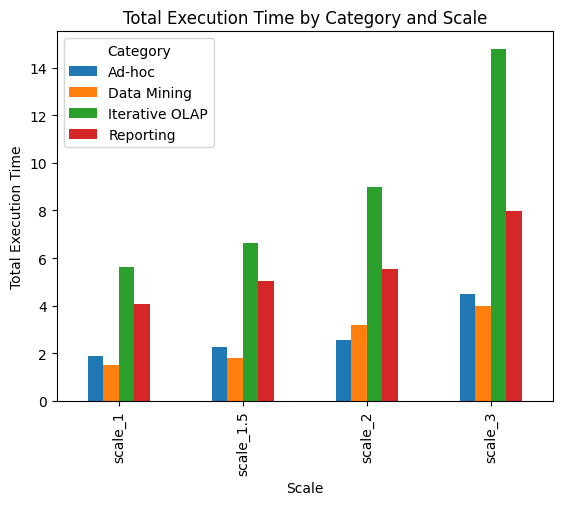

In [15]:
all_data_df.index = pd.MultiIndex.from_tuples(all_data_df.index, names=["Scale", "Category"])
plt.figure(figsize=(10, 6))
all_data_df['Total_Time'].unstack().plot(kind='bar', title='Total Execution Time by Category and Scale')
plt.ylabel('Total Execution Time')
plt.show()

<Figure size 1000x600 with 0 Axes>

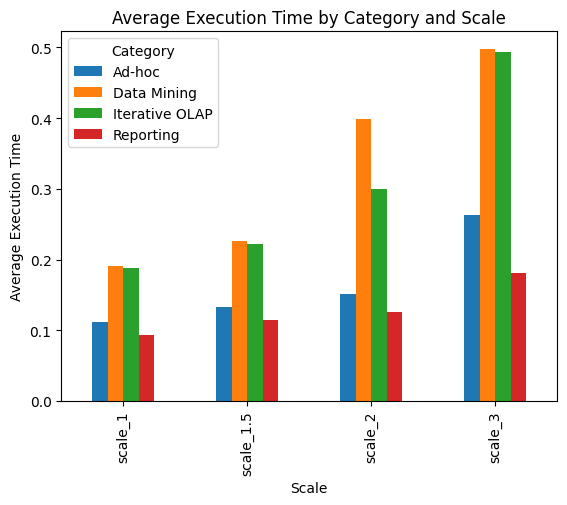

In [6]:
plt.figure(figsize=(10, 6))
all_data_df['Average_Time'].unstack().plot(kind='bar', title='Average Execution Time by Category and Scale')
plt.ylabel('Average Execution Time')
plt.show()

<Figure size 1000x600 with 0 Axes>

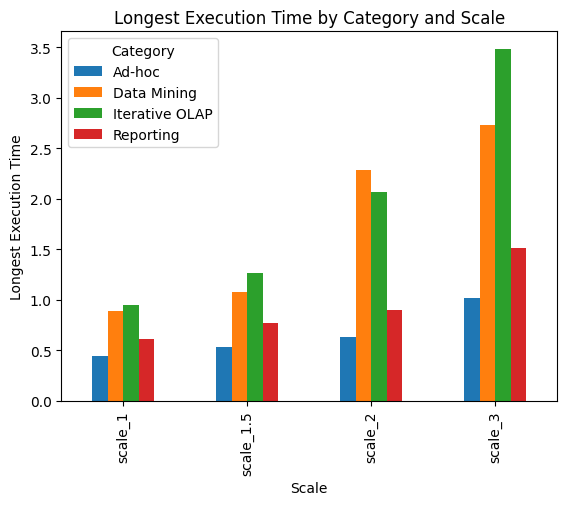

In [7]:
plt.figure(figsize=(10, 6))
all_data_df['Longest_Time'].unstack().plot(kind='bar', title='Longest Execution Time by Category and Scale')
plt.ylabel('Longest Execution Time')
plt.show()

<Figure size 1000x600 with 0 Axes>

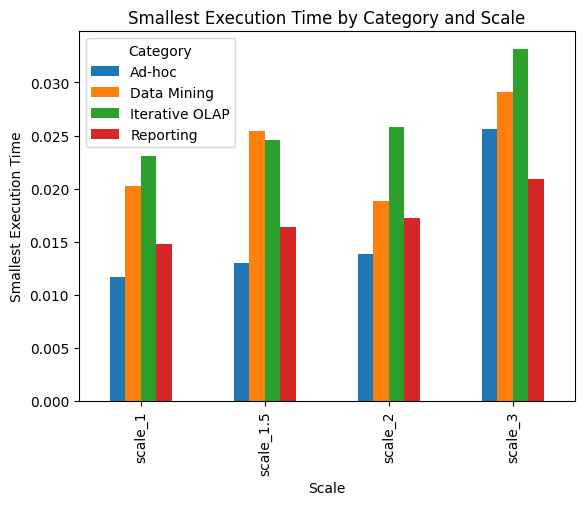

In [8]:
plt.figure(figsize=(10, 6))
all_data_df['Smallest_Time'].unstack().plot(kind='bar', title='Smallest Execution Time by Category and Scale')
plt.ylabel('Smallest Execution Time')
plt.show()

In [10]:
stats_df = pd.DataFrame.from_dict(stats)

In [11]:
stats_df

,Total_Time,Longest_Time,Smallest_Time,Mean_Time
scale_1,13.153066,0.950181,0.011678,0.132859
scale_1.5,15.779200,1.264749,0.013020,0.159386
scale_2,20.261847,2.287102,0.013800,0.204665
scale_3,31.210140,3.482638,0.020874,0.315254


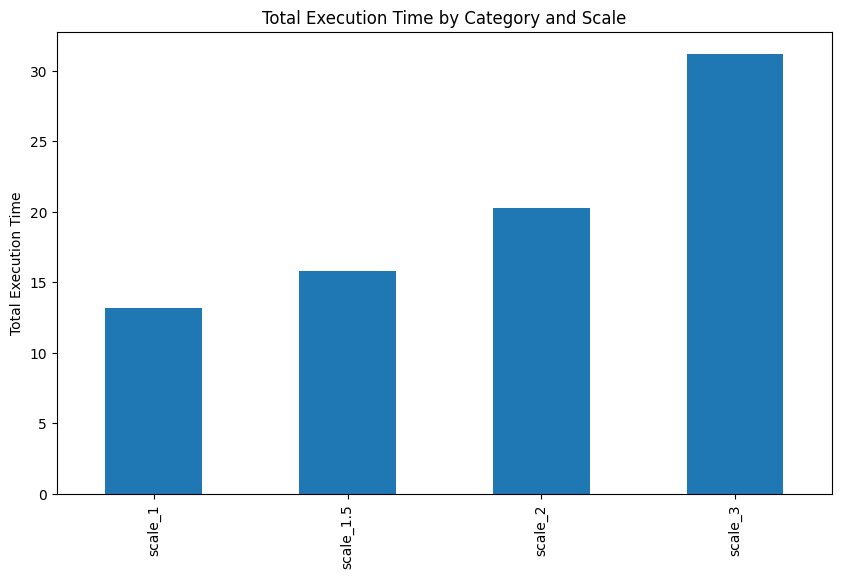

In [16]:
plt.figure(figsize=(10, 6))
stats_df['Total_Time'].plot(kind='bar', title='Total Execution Time by scale')
plt.ylabel('Total Execution Time')
plt.show()

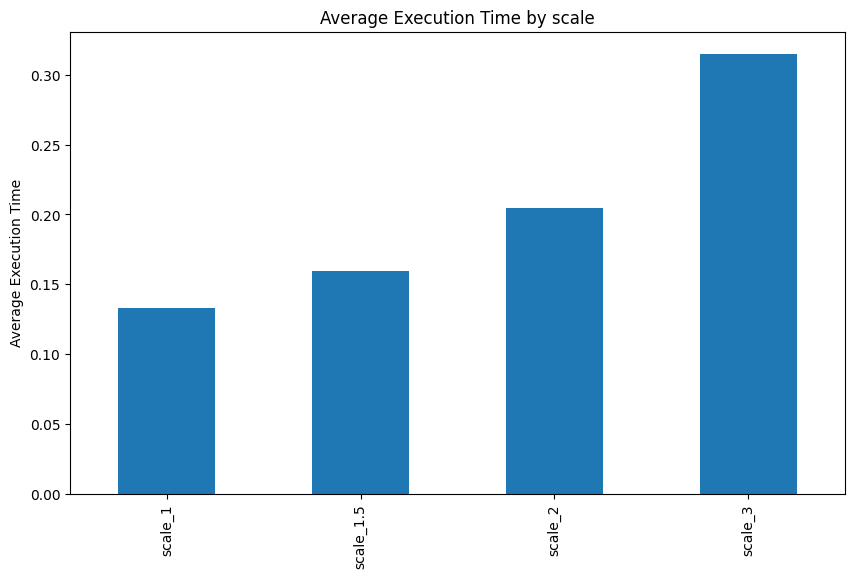

In [17]:
plt.figure(figsize=(10, 6))
stats_df['Mean_Time'].plot(kind='bar', title='Average Execution Time by scale')
plt.ylabel('Average Execution Time')
plt.show()

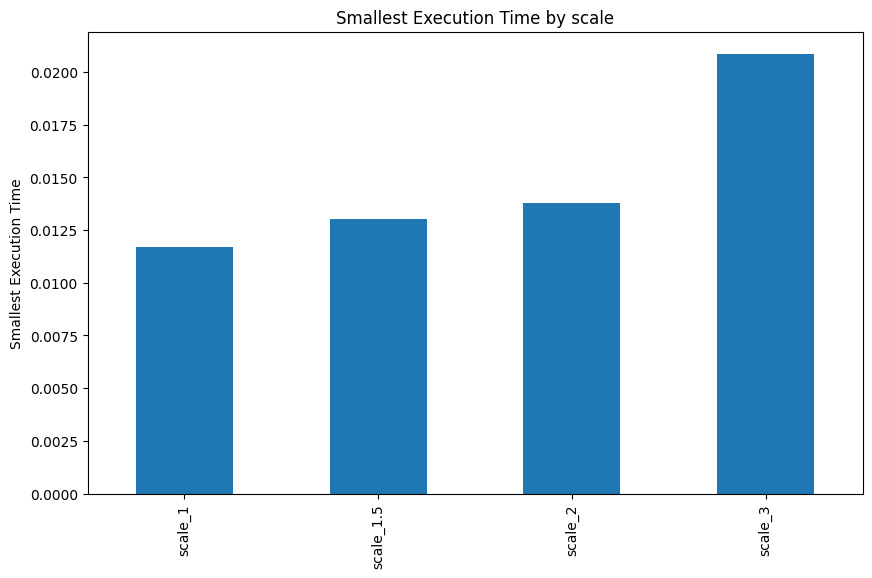

In [18]:
plt.figure(figsize=(10, 6))
stats_df['Smallest_Time'].plot(kind='bar', title='Smallest Execution Time by scale')
plt.ylabel('Smallest Execution Time')
plt.show()

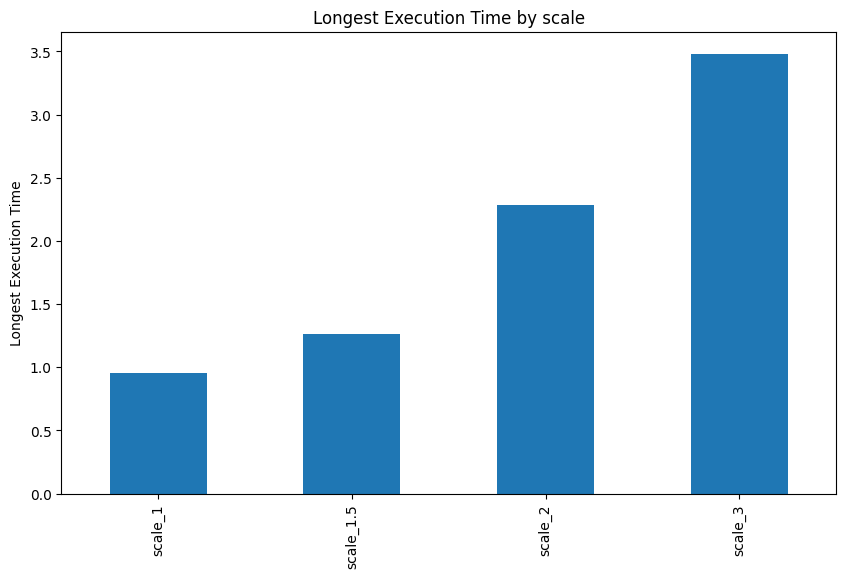

In [19]:
plt.figure(figsize=(10, 6))
stats_df['Longest_Time'].plot(kind='bar', title='Longest Execution Time by scale')
plt.ylabel('Longest Execution Time')
plt.show()